## Importing

### Import Libraries

In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re 
from sklearn import preprocessing
import numpy as np

### Import Data

In [373]:
url = 'https://raw.githubusercontent.com/sami12rom/Titanic/master/train.csv'
data = pd.read_csv(url)

## Data Pre-processing

In [374]:
#Remove un-needed columns
data=data[data.columns.difference(['Name','Cabin','Ticket'])]
data = data[['PassengerId','Survived','Age','Sex','Fare','Embarked','Pclass','Parch','SibSp']]
										

#Replace null Ages with Median
data['Age'].fillna(data['Age'].median(), inplace=True)
data=data.dropna(subset=['Embarked'],axis=0)

#Encode Sex
data['Sex'] = data['Sex'].replace(['male','female'],[1,0])

#Remove String from Tickets
#new = data['Ticket'].str.split('\s+',1)
#data['Ticket'] = [x[1] if len(x) > 1 else x[0] for x in new]

#One Hot Encode the Pclass (Ticket Class)
data = pd.concat([data,pd.get_dummies(data['Pclass'],prefix='tktclass')],axis=1)
data = data.drop(['Pclass'],axis=1)

#One Hot Encode the Embark Location
data['Embarked'] = data['Embarked'].replace(['S','C','Q'],['Southampton','Cherbourg','Queenstown'])
data=pd.concat([data,pd.get_dummies(data['Embarked'],prefix='Embark')],axis=1)
data.drop(['Embarked'],axis=1,inplace=True)

#Set PassengerId as Index
data=data.set_index('PassengerId')
data.head()

,Survived,Age,Sex,Fare,Parch,SibSp,tktclass_1,tktclass_2,tktclass_3,Embark_Cherbourg,Embark_Queenstown,Embark_Southampton
PassengerId,,,,,,,,,,,,
1,0,22.0,1,7.2500,0,1,0,0,1,0,0,1
2,1,38.0,0,71.2833,0,1,1,0,0,1,0,0
3,1,26.0,0,7.9250,0,0,0,0,1,0,0,1
4,1,35.0,0,53.1000,0,1,1,0,0,0,0,1
5,0,35.0,1,8.0500,0,0,0,0,1,0,0,1


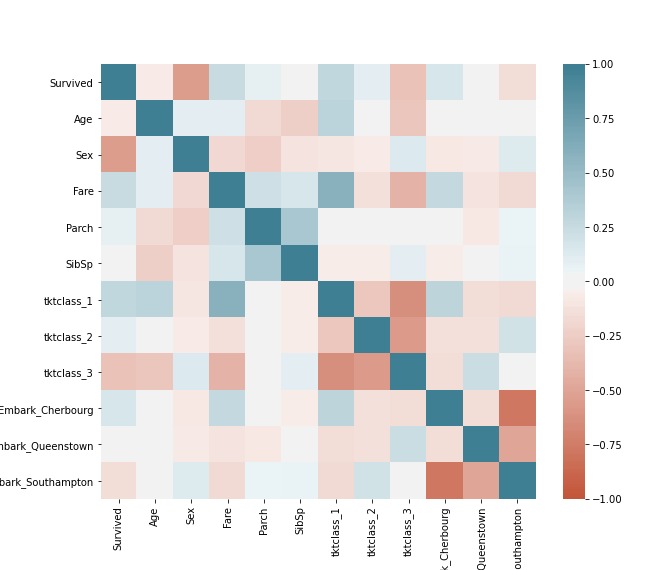

In [375]:
fig = plt.subplots(figsize=(10,8))
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1,center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

## Feature Normalizing & Engineering

In [312]:
Features = data.columns.difference(['Parch','SibSp','Survived'])
Features

Index(['Age', 'Embark_Cherbourg', 'Embark_Queenstown', 'Embark_Southampton',
       'Fare', 'Sex', 'tktclass_1', 'tktclass_2', 'tktclass_3'],
      dtype='object')

In [313]:
x = data[Features]
y=data['Survived'].values
x

,Age,Embark_Cherbourg,Embark_Queenstown,Embark_Southampton,Fare,Sex,tktclass_1,tktclass_2,tktclass_3
PassengerId,,,,,,,,,
1,22.0,0,0,1,7.2500,1,0,0,1
2,38.0,1,0,0,71.2833,0,1,0,0
3,26.0,0,0,1,7.9250,0,0,0,1
4,35.0,0,0,1,53.1000,0,1,0,0
5,35.0,0,0,1,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,1,13.0000,1,0,1,0
888,19.0,0,0,1,30.0000,0,1,0,0
889,28.0,0,0,1,23.4500,0,0,0,1


In [314]:
x= preprocessing.StandardScaler().fit(x).transform(x)
x

array([[-0.56367407, -0.48271079, -0.30794088, ..., -0.56306042,
        -0.51087465,  0.90032807],
       [ 0.66921696,  2.07163382, -0.30794088, ...,  1.77600834,
        -0.51087465, -1.11070624],
       [-0.25545131, -0.48271079, -0.30794088, ..., -0.56306042,
        -0.51087465,  0.90032807],
       ...,
       [-0.10133993, -0.48271079, -0.30794088, ..., -0.56306042,
        -0.51087465,  0.90032807],
       [-0.25545131,  2.07163382, -0.30794088, ...,  1.77600834,
        -0.51087465, -1.11070624],
       [ 0.20688282, -0.48271079,  3.24737656, ..., -0.56306042,
        -0.51087465,  0.90032807]])

In [335]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4, stratify=y)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (711, 9) (711,)
Test set: (178, 9) (178,)


In [321]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

## Classification

#### Logistic Regression

In [372]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
print(LR)
yhatlr = LR.predict(x_test)
print("Prediction: ",yhatlr[0:5])
print("Sample    : ",y_test [0:5])
print("Logistic Regression Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(x_train)))
print("Logistic Regression Test set Accuracy: ", metrics.accuracy_score(y_test, yhatlr))

LogisticRegression(C=0.01, solver='liblinear')
Prediction:  [0 1 1 0 0]
Sample    :  [1 1 1 0 0]
Logistic Regression Train set Accuracy:  0.8016877637130801
Logistic Regression Test set Accuracy:  0.7415730337078652


### Support Vector Machine

In [365]:
clf = svm.SVC(kernel='rbf')
print(clf)
clf.fit(x_train, y_train)
yhatsvm = clf.predict(x_test)
print("Prediction: ",yhatsvm [0:5])
print("Sample    : ",y_test [0:5])
print("SVM Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(x_train)))
print("SVM Test set Accuracy: ", metrics.accuracy_score(y_test, yhatsvm))

SVC()
Prediction:  [0 1 1 0 0]
Sample    :  [1 1 1 0 0]
SVM Train set Accuracy:  0.8368495077355836
SVM Test set Accuracy:  0.7696629213483146


### Decision Tree

In [367]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
print(drugTree)
drugTree.fit(x_train,y_train)
predTree = drugTree.predict(x_test)
print ("Prediction: ",predTree [0:5])
print("Sample    : ",y_test [0:5])
print("Decision Tree Train set Accuracy: ", metrics.accuracy_score(y_train, drugTree.predict(x_train)))
print("Decision Tree Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTreeClassifier(criterion='entropy', max_depth=4)
Prediction:  [0 1 1 0 0]
Sample    :  [1 1 1 0 0]
Decision Tree Train set Accuracy:  0.8466947960618847
Decision Tree Test set Accuracy:  0.7808988764044944


### KNN Nearest Neighbour

The best accuracy was with 0.7865168539325843 with k= 5


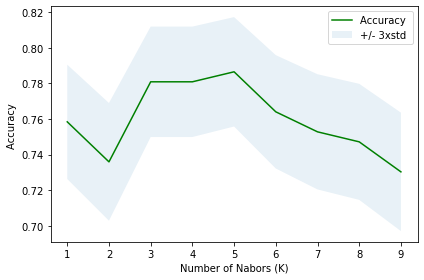

In [370]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhatknn=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhatknn)

    
    std_acc[n-1]=np.std(yhatknn==y_test)/np.sqrt(yhatknn.shape[0])
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [371]:
k=5
nn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
print(nn)

yhatknn = nn.predict(x_test)
print("Prediction: ",yhatknn[0:5])
print("Sample    : ",y_test [0:5])
print("Train set Accuracy: ", metrics.accuracy_score(y_train, nn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatknn))

KNeighborsClassifier()
Prediction:  [0 1 1 0 0]
Sample    :  [1 1 1 0 0]
Train set Accuracy:  0.8593530239099859
Test set Accuracy:  0.7865168539325843
